In [22]:
import pickle as pkl
import numpy as np
dataset_name = 'pl'
input_path = '../../../Datasets/model_input_data/'

In [37]:
def doc_preprocessing(doc):
    """word count normalisation per document"""
    doc_preprocessed = []
    for row in doc:
        max_row = np.log(1 + np.max(row))
        doc_preprocessed.append(np.log(1 + row) / max_row)

    return np.asarray(doc_preprocessed)

def generate_symmetric_adjacency_matrix(adjacency_matrix):
    """create symmetric adjacency matrix"""
    adjacency_matrix_symm = np.zeros((len(adjacency_matrix), len(adjacency_matrix)))
    for row_idx in range(len(adjacency_matrix)):
        for col_idx in range(len(adjacency_matrix)):
            if adjacency_matrix[row_idx, col_idx] == 1:
                adjacency_matrix_symm[row_idx, col_idx] = 1
                adjacency_matrix_symm[col_idx, row_idx] = 1
            if row_idx == col_idx:
                adjacency_matrix_symm[row_idx, col_idx] = 1

    return adjacency_matrix_symm 

def sgc_precompute(adj, degree):
    adj_degree = adj
    for i in range(degree-1):
        adj_degree = np.dot(adj, adj_degree)
    return adj_degree

def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    # adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))  # D-degree matrix
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = np.diag(d_inv_sqrt)
    return np.dot(np.dot(adj, d_mat_inv_sqrt).transpose(), d_mat_inv_sqrt)

def adj_to_bias(adj, sizes, nhood=1):
    nb_graphs = adj.shape[0]
    mt = np.empty(adj.shape)
    for g in range(nb_graphs):
        mt[g] = np.eye(adj.shape[1])
        for _ in range(nhood):
            mt[g] = np.matmul(mt[g], (adj[g] + np.eye(adj.shape[1])))
        for i in range(sizes[g]):
            for j in range(sizes[g]):
                if mt[g][i][j] > 0.0:
                    mt[g][i][j] = 1.0
    return -1e9 * (1.0 - mt)


In [8]:
context_arr = np.loadtxt('./cora/' + dataset_name + '/content.txt')

In [9]:
context_arr.shape

(1552, 4105)

In [12]:
doc = doc_preprocessing(np.loadtxt('./cora/' + dataset_name + '/content.txt'))
num_doc = len(doc)
label = np.loadtxt('./cora/' + dataset_name + '/label.txt')
adjacency_matrix = generate_symmetric_adjacency_matrix(np.loadtxt('./cora/' + dataset_name + '/adjacency_matrix.txt'))

In [18]:
adjacency_matrix = normalize_adj(adjacency_matrix)

In [30]:
with open("./cora/ind.{}.ppmi".format(dataset_name), 'rb') as f:
    pmi = pkl.load(f)

pmi = normalize_adj(pmi.toarray())

In [32]:
pmi.shape

(4105, 4105)

In [31]:
pmi

array([[0.        , 0.0125059 , 0.01123539, ..., 0.        , 0.        ,
        0.        ],
       [0.0125059 , 0.        , 0.01159017, ..., 0.        , 0.        ,
        0.        ],
       [0.01123539, 0.01159017, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
adjacency_matrix

array([[0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04347826, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ]])

In [14]:
adjacency_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
np.loadtxt('./cora/' + dataset_name + '/adjacency_matrix.txt')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
doc = np.loadtxt(input_path + 'content_count.txt')

In [30]:
doc_preprocessing(doc).sum()

27265.21621186975

In [33]:
adj_matrix = np.loadtxt(input_path + 'doc_doc_adjacency_matrix.txt')

In [34]:
adj_matrix

array([[0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [36]:
adj_matrix = generate_symmetric_adjacency_matrix(adj_matrix) # add self connections
adj_matrix

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [38]:
normalize_adj(adj_matrix)

array([[0.00038986, 0.00038494, 0.00039002, ..., 0.00038994, 0.00038858,
        0.        ],
       [0.00038494, 0.00038008, 0.00038509, ..., 0.00038502, 0.00038367,
        0.        ],
       [0.00039002, 0.00038509, 0.00039017, ..., 0.00039009, 0.00038873,
        0.        ],
       ...,
       [0.00038994, 0.00038502, 0.00039009, ..., 0.00039002, 0.00038865,
        0.        ],
       [0.00038858, 0.00038367, 0.00038873, ..., 0.00038865, 0.0003873 ,
        0.0014093 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0014093 ,
        0.00512821]])

In [ ]:
sgc_precompute

In [37]:
import os
import random
import numpy as np
import pickle as pkl
import scipy.sparse as sp
from math import log
from sklearn import svm
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
from scipy.spatial.distance import cosine
from data_preparation import *

In [4]:
def loadWord2Vec(filename):
    """Read Word Vectors"""
    #vocab = []
    #embd = []
    word_vector_map = {}
    file = open(filename, 'r', encoding="utf8")
    for line in file.readlines():
        row = line.strip().split(' ')
        if (len(row) > 2):
            #vocab.append(row[0])
            vector = row[1:]
            length = len(vector)
            for i in range(length):
                vector[i] = float(vector[i])
            #embd.append(vector)
            word_vector_map[row[0]] = vector
    print('Loaded Word Vectors!')
    file.close()
    return word_vector_map

What is GloVe? ("what is glove.6B.300d.txt1 / 1" prompt. ChatGPT, August 3 Version, OpenAI, 25 Sept. 2023. https://chat.openai.com.)
- "glove.6B.300d.txt" is a file that is typically associated with the GloVe (Global Vectors for Word Representation) word embedding model. GloVe is a popular technique for representing words as dense vectors in a continuous vector space. These word vectors are trained on large text corpora and capture semantic relationships between words.
- The file "glove.6B.300d.txt" specifically refers to a pre-trained GloVe model with 300-dimensional word vectors. In this file, each line typically represents a word followed by its corresponding 300-dimensional vector, all separated by spaces. These vectors are generated through unsupervised learning techniques and can be used for various natural language processing tasks, such as text classification, sentiment analysis, machine translation, and more.
- Researchers and developers often use pre-trained GloVe word embeddings like "glove.6B.300d.txt" to improve the performance of their natural language processing models, as these embeddings can capture semantic information about words and their relationships in a way that is beneficial for various text-based tasks.

In [5]:
# load GloVe word vector into memory
word_vector_file = './cora/glove.6B.300d.txt'
word_vector_map = loadWord2Vec(word_vector_file)

Loaded Word Vectors!


In [14]:
# get the word embedding for each token in the vocabulary
word_embedding = []
dataset_name = "pl"
voc = np.genfromtxt('./cora/' + dataset_name + '/voc.txt', dtype=str)
num_tokens = len(voc)
for i in range(num_tokens):
    if voc[i] in word_vector_map:
        word_embedding.append(word_vector_map[voc[i]])
    else:
        word_embedding.append(np.zeros(300))

In [18]:
# get a list of word positions within the window size
window_size = 20
windows = [] 
doc = np.loadtxt('./cora/' + dataset_name + '/content.txt')
for d in doc:
    word = []
    for i, w in enumerate(d):
        if 0 < w:
            word.append(i)
    length = len(word)
    if length < window_size:
        windows.append(word)
    else:
        for j in range(length - window_size + 1):
            window = word[j: j + window_size]
            windows.append(window)

In [23]:
# get the word frequency over all word window lists
word_window_freq = {}
for window in windows:
    appeared = set()
    for i in range(len(window)):
        if window[i] in appeared:
            continue
        if window[i] in word_window_freq:
            word_window_freq[window[i]] += 1
        else:
            word_window_freq[window[i]] = 1
        appeared.add(window[i])
    

In [25]:
# get word co-occurrence count in all word windows
word_pair_count = {}
for window in windows:
    for i in range(1, len(window)):
        for j in range(0, i):
            word_i_id = window[i]
            word_j_id = window[j]
            if word_i_id == word_j_id:
                continue
            word_pair_str = str(word_i_id) + ',' + str(word_j_id)
            if word_pair_str in word_pair_count:
                word_pair_count[word_pair_str] += 1
            else:
                word_pair_count[word_pair_str] = 1
            # two orders
            word_pair_str = str(word_j_id) + ',' + str(word_i_id)
            if word_pair_str in word_pair_count:
                word_pair_count[word_pair_str] += 1
            else:
                word_pair_count[word_pair_str] = 1

In [30]:
# compute PPMI (Pointwise Mutual Information)
row = []
col = []
weight = []
num_window = len(windows)
for key in word_pair_count:
    temp = key.split(',')
    i = int(temp[0])
    j = int(temp[1])
    count = word_pair_count[key] # co-occurence count 
    word_freq_i = word_window_freq[i] # individual word frequency over all word windows 
    word_freq_j = word_window_freq[j]
    pmi = np.log((1.0 * count / num_window) /
              (1.0 * word_freq_i * word_freq_j/(num_window * num_window)))
    if pmi <= 0:
        continue
    row.append(i)
    col.append(j)
    weight.append(pmi)

In [48]:
adj = sp.csr_matrix(
    (weight, (row, col)), shape=(num_tokens, num_tokens))
f = open("./cora/ind.test.ppmi".format(dataset_name), 'wb')
pkl.dump(adj, f)

In [68]:
with open("./cora/ind.test.ppmi", 'rb') as f:
    pmi = pkl.load(f)
    pmi = normalize_adj(pmi.toarray())

In [69]:
pmi

array([[0.        , 0.0125059 , 0.01123539, ..., 0.        , 0.        ,
        0.        ],
       [0.0125059 , 0.        , 0.01159017, ..., 0.        , 0.        ,
        0.        ],
       [0.01123539, 0.01159017, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
# from matplotlib.backends.backend_pdf import PdfPages
# from sklearn.manifold import TSNE
# from matplotlib import pyplot as plt
import numpy as np
# import pickle as pkl
# import random
# f = open('results/transductive/ml_64_test_vocenc.txt', 'r')
f = open('results/64_test_voc.txt', 'r')
embedding_lines = f.readlines()
f.close()
voc = np.genfromtxt('../../../Datasets/model_input_data/vocab.txt', dtype=str)
#with open("data/ind.20ng.adj", 'rb') as f:
#    npmi = pkl.load(f)
#npmi = npmi.toarray()
docs = []
vocab = {}
for i in range(len(voc)):
    vocab[voc[i]] = i

In [18]:
for i in range(len(embedding_lines)):
    #line = embedding_lines[i].strip()
    #temp = line.split('\t')
    emb_str = embedding_lines[i].strip().split()
    values = [float(x) for x in emb_str]
    #label = np.argmax(values)
    docs.append(values)
docs = np.array(docs)
emb = np.array(list(zip(*docs)))

In [30]:

def print_top_words(beta, feature_names, n_top_words=10):
    #print('---------------Printing the Topics------------------')
    coherence = []
    for i in range(len(beta)):
        topic_assoc = []
        print(f'Topic #{i+1}: ' + " ".join([feature_names[j]
            for j in beta[i].argsort()[:-n_top_words - 1:-1]]))
        word_id = beta[i].argsort()[:-n_top_words - 1:-1]
    #     for j in range(0,19):
    #        word_one = word_id[j]
    #        for k in range(j+1,20):
    #            word_two = word_id[k]
    #             topic_assoc.append(npmi[word_one,word_two])
    #     topic_coh = float(sum(topic_assoc)) / len(topic_assoc)
    #     coherence.append(topic_coh)
    #     print('coherence:',topic_coh)
    # print('---------------End of Topics------------------')
    #return coherence
# for i in range(len(embedding_lines)):
#     #line = embedding_lines[i].strip()
#     #temp = line.split('\t')
#     emb_str = embedding_lines[i].strip().split()
#     values = [float(x) for x in emb_str]
#     #label = np.argmax(values)
#     docs.append(values)
# docs = np.array(docs)
# emb = np.array(list(zip(*docs)))
#coherence = \
print_top_words(emb, list(zip(*sorted(vocab.items(), key=lambda x: x[1])))[0])
#print('mean_coherence:', float(sum(coherence)) / len(coherence))

Topic #1: hydrogen energy fuel powered green new power electric cell world
Topic #2: hydrogenhighway hydrogenics pink showing landing contact otc honeywell eni photocatalytic
Topic #3: thanks scientists truck tech powered renewables power produce latest cells
Topic #4: hydrogen green energy fuel future production new powered technology power
Topic #5: hydrogen fuel energy green cell powered future new power news
Topic #6: worldsmileday alvera cec walmart mauritania expressions isee leaving dust lineup
Topic #7: hydrogen energy fuel green powered power new cell toyota future
Topic #8: sinot centralized consultation industrialise bow futureof billybo cleanenergynow cons energymonitorai
Topic #9: scotlands susty eclipse newswise profiles pee bow advise regulatory metallize
Topic #10: energy hydrogen fuel powered future green new news cell production
Topic #11: bello laurencereed bankofamerica gadget reefs studio gestures intros dianapitchers tie
Topic #12: intensification bdew alvera lave

In [54]:
# from matplotlib.backends.backend_pdf import PdfPages
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

# label = np.loadtxt('./cora/' + 'ml' + '/label.txt')
f0 = open('results/64_training.txt', 'r')
# f0 = open('results/64_test.txt', 'r')
t_embedding_lines = f0.readlines()
f0.close()

#label_test = label[int(num_doc * (training_ratio + validation_ratio)):]
# labels = []
docs = []
for i in range(len(t_embedding_lines)):
    # labels.append(label[i])
    emb_str = t_embedding_lines[i].strip().split()
    #values_str_list = emb_str[1:]
    values = [float(x) for x in emb_str]
    docs.append(values)
fea = TSNE(n_components=2).fit_transform(docs)
# pdf = PdfPages('ml_doc_test.pdf')
# cls = np.unique(label)
# label = labels
# fea_num = [fea[label == i] for i in cls]
# for i, f in enumerate(fea_num):
#     if cls[i] in range(10):
#         plt.scatter(f[:, 0], f[:, 1], label=cls[i],marker = '.')
#     else:
#         plt.scatter(f[:, 0], f[:, 1], label=cls[i],marker = '.')
# plt.tight_layout()
# pdf.savefig()
# plt.show()
# pdf.close()

In [55]:
fea.shape

(1969, 2)

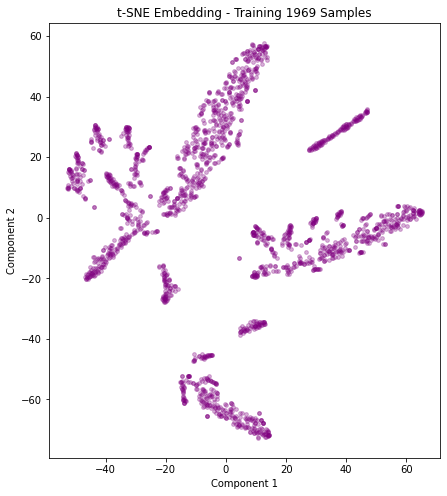

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a 2-D embedding in the variable 'tsne_embedding' of shape (1969, 2)
# Replace 'tsne_embedding' with your actual data

# Create a scatter plot of the t-SNE embedding
plt.figure(figsize=(7, 8))  # Adjust the figure size as needed
plt.scatter(fea[:, 0], fea[:, 1], s=14, alpha=0.3, color='purple')  # 's' controls the marker size

# Add labels and a title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f't-SNE Embedding - Training {fea.shape[0]} Samples')

# Show the plot
plt.show()

#### Tensorboard - Original GTNN

In [1]:
class GTM():
    def __init__(self, args, data):

        self.parse_args(args, data)
        self.show_config()
        self.generate_placeholders()
        self.generate_variables()

    def parse_args(self, args, data):

        self.data = data
        # self.dataset_name = args.dataset_name
        self.num_doc = self.data.num_doc
        # self.num_labels = int(max(self.data.label))
        self.tokens = self.data.num_tokens

        self.learning_rate = args.learning_rate
        self.num_epoch = args.num_epoch
        #self.trans_induc = args.trans_induc
        #self.x = args.x
        self.training_ratio = args.training_ratio
        self.minibatch_size = args.minibatch_size
        self.num_topics = args.num_topics
        self.weight = args.weight

    def show_config(self):

        print('******************************************************')
        # print('dataset name:', self.dataset_name)
        print('#documents:', self.num_doc)
        print('#tokens:', self.data.num_tokens)
        # print('#labels:', self.num_labels)

        print('learning rate:', self.learning_rate)
        print('#epoch:', self.num_epoch)
        print('training ratio:', self.training_ratio)
        print('minibatch size:', self.minibatch_size)
        print('#topics:', self.num_topics)
        print('******************************************************')

    def generate_placeholders(self):

        self.doc = tf.placeholder('float64', [None, self.data.num_tokens])
        self.doc_voc = tf.placeholder('float64', [None, self.data.num_tokens])
        self.pmi = tf.placeholder('float64', [self.data.num_tokens,self.data.num_tokens])
        
        self.adj = tf.placeholder('float64', [None,self.data.num_doc])
        #self.feature = tf.placeholder('float64', [None,self.data.num_voc])
        self.sgc_pre_adj = tf.placeholder('float64', [None, self.data.num_tokens])

    def generate_variables(self):

        self.weights = {
            'encoder_d': tf.Variable(tf.random_normal([self.data.num_tokens, self.num_topics], dtype='float64'), dtype='float64'),
            'decoder_d': tf.Variable(tf.random_normal([self.data.num_doc, self.num_topics], dtype='float64'), dtype='float64'),
            'encoder_v': tf.Variable(
                tf.random_normal([self.data.num_tokens, self.num_topics], dtype='float64'),
                dtype='float64'),
            'inter_encoder_d': tf.Variable(tf.random_normal([self.data.num_tokens, self.num_topics], dtype='float64'),
                                     dtype='float64'),
            'inter_encoder_v': tf.Variable(
                tf.random_normal([self.data.num_tokens, self.num_topics], dtype='float64'),
                dtype='float64'),
        }
        self.biases = {
            'encoder_b_d': tf.Variable(tf.random_normal([self.num_topics], dtype='float64'), dtype='float64'),
            'encoder_b_v': tf.Variable(tf.random_normal([self.num_topics], dtype='float64'), dtype='float64'),
            'inter_encoder_b_d': tf.Variable(tf.random_normal([self.num_topics], dtype='float64'), dtype='float64'),
            'inter_encoder_b_v': tf.Variable(tf.random_normal([self.num_topics], dtype='float64'), dtype='float64'),
            'decoder_b_d_v': tf.Variable(tf.random_normal([len(self.data.input_training[0])], dtype='float64'), dtype='float64'),
            'decoder_b_v_v': tf.Variable(tf.random_normal([len(self.data.input_training[0])], dtype='float64'),
                                         dtype='float64'),
            'decoder_b_d_d': tf.Variable(tf.random_normal([self.data.num_doc], dtype='float64'),
                                         dtype='float64')
        }

    def encoder(self):
        # weight for message passing
        intra_doc_feature = tf.nn.tanh(tf.add(self.weights['encoder_d'], self.biases['encoder_b_d']))
        intra_voc_feature = tf.nn.tanh(tf.add(self.weights['encoder_v'], self.biases['encoder_b_v']))
        inter_doc_feature = tf.nn.tanh(tf.add(tf.matmul(self.doc,self.weights['inter_encoder_d']), self.biases['inter_encoder_b_d']))
        inter_voc_feature = tf.nn.tanh(tf.add(self.weights['inter_encoder_v'], self.biases['inter_encoder_b_v']))
        # intra-domain message passing
        intra_doc_embedding = tf.nn.tanh(tf.matmul(self.sgc_pre_adj, intra_doc_feature))
        intra_voc_embedding = tf.nn.tanh(tf.matmul(self.pmi, intra_voc_feature))
        # inter-domain message passing
        inter_doc_embedding = tf.nn.tanh(tf.matmul(self.doc_voc, inter_voc_feature))
        inter_voc_embedding = tf.nn.tanh(tf.matmul(tf.transpose(self.doc_voc, perm=[1, 0]), inter_doc_feature))

        self.doc_embed = intra_doc_embedding + inter_doc_embedding
        self.voc_embed = intra_voc_embedding + inter_voc_embedding

        return self.doc_embed, self.voc_embed

    def decoder(self):
        r_doc_voc = tf.add(tf.matmul(self.doc_embed, tf.transpose(self.voc_embed)), self.biases['decoder_b_d_v'])
        r_doc_doc = tf.add(tf.matmul(self.doc_embed, tf.transpose(self.weights['decoder_d'])),self.biases['decoder_b_d_d'])
        r_voc_voc = tf.add(tf.matmul(self.voc_embed, tf.transpose(self.weights['encoder_v'])), self.biases['decoder_b_v_v'])
        dv_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_doc_voc, labels=self.doc_voc))
        dd_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_doc_doc, labels=self.adj))
        vv_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_voc_voc, labels=self.pmi))
        loss = self.weight*dv_loss + dd_loss + vv_loss
        return loss, dv_loss, dd_loss, vv_loss

    def construct_model(self):
        self.encoder()
        loss, dv_loss, dd_loss, vv_loss = self.decoder()

        return loss, dv_loss, dd_loss, vv_loss

    def train(self):

        loss, dv_loss, dd_loss, vv_loss= self.construct_model()
        optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(loss)
        init = tf.global_variables_initializer()
        with tf.Session() as sess:
            sess.run(init)
            t = time.time()
            # best_acc = 0.0
            # best_nmi = 0.0
            for epoch_index in range(1, self.num_epoch + 1):
                _, one_epoch_loss,o_dv_loss, o_dd_loss, o_vv_loss = sess.run([optimizer, loss, dv_loss, dd_loss, vv_loss], feed_dict={
                                                                           self.doc: self.data.input_training,
                                                                           self.doc_voc: self.data.adj_feature_training,
                                                                           self.sgc_pre_adj:self.data.adj_input_training,
                                                                           self.pmi:self.data.pmi,
                                                                           self.adj:self.data.adj_training})
                if epoch_index % 50 == 0 or epoch_index == 1:
                    print('******************************************************')
                    print('Time: %ds' % (time.time() - t), '\tEpoch: %d/%d' % (epoch_index, self.num_epoch), '\tLoss: %f' % one_epoch_loss,
                          '\tdv_Loss: %f' % o_dv_loss, '\tdd_Loss: %f' % o_dd_loss, '\tvv_Loss: %f' % o_vv_loss)

                    doc_embed_training = sess.run(self.doc_embed, feed_dict={self.doc: self.data.input_training, self.doc_voc: self.data.adj_feature_training,
                                                                       self.pmi:self.data.pmi, self.sgc_pre_adj:self.data.adj_input_training})
                    doc_embed_test = sess.run(self.doc_embed, feed_dict={self.doc: self.data.input_test, self.doc_voc: self.data.adj_feature_test,
                                                                       self.pmi:self.data.pmi, self.sgc_pre_adj:self.data.adj_input_test})


                    # acc = classification_knn('inductive', X_train=doc_embed_training, X_test=doc_embed_test, Y_train=self.data.label_training, Y_test=self.data.label_test)
                    # nmi = clustering_kmeans('inductive', X_train=doc_embed_training, X_test=doc_embed_test, Y_train=self.data.label_training, Y_test=self.data.label_test)
                    # if best_acc < acc and best_nmi < nmi:
                    #     best_acc = acc
                    #     best_nmi = nmi
                    #     print('best_acc_nmi:', best_acc, best_nmi)
                    voc_embed_test = sess.run(self.voc_embed,
                                                feed_dict={self.doc: self.data.input_test,
                                                            self.doc_voc: self.data.adj_feature_test,
                                                            self.pmi: self.data.pmi, self.sgc_pre_adj: self.data.adj_input_test})
                    #x = '' if self.x == 0 else '_x'
                    np.savetxt('./results/' + str(self.num_topics) + '_training' + '.txt', doc_embed_training, delimiter='\t')
                    np.savetxt('./results/' + str(self.num_topics) + '_test' + '.txt', doc_embed_test, delimiter='\t')
                    np.savetxt('./results/' + str(self.num_topics) + '_test_voc' + '.txt', voc_embed_test, delimiter='\t')
            print('Finish training! Training time:', time.time() - t)

            print('Finish saving embeddings!')


In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard module is not an IPython extension.


In [3]:
import tensorflow as tf

c:\Users\tiffa\anaconda3\envs\research\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\tiffa\anaconda3\envs\research\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\tiffa\anaconda3\envs\research\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\tiffa\anaconda3\envs\research\lib\site-packages\tensorf

In [6]:
tf.add([[1,2,3], [1,2,3], [1,2,3]], [3,3,3]).print()

AttributeError: 'Tensor' object has no attribute 'print'

In [10]:
arr1 = [[10, 20, 30, 40, 50],[10, 20, 30, 40, 50],[10, 20, 30, 40, 50]]
arr2 = [5, 10, 15, 20, 25]

In [19]:
input_shape = [2, 3]
input_shape2 = [3]
x1 = tf.random_normal(input_shape)
x2 = tf.random_normal(input_shape2)
y = tf.add(x1, x2)
y

<tf.Tensor 'Add_7:0' shape=(2, 3) dtype=float32>